In [1]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [3]:
iris = fashion_mnist.load_data()

print(iris)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [7]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

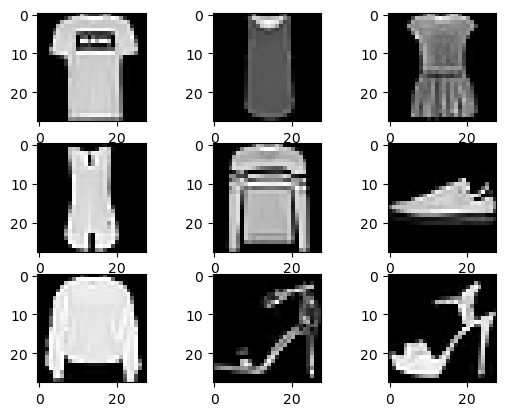

In [9]:
for i in range(1, 10):
	# Create a 3x3 grid and place the
	# image in ith position of grid
	plt.subplot(3, 3, i)
	# Insert ith image with the color map 'grap'
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()


In [46]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)
print(trainy.shape)



(60000, 28, 28, 1, 1)
(60000,)


In [47]:
# Define the model architecture
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(28, input_shape=(28, 28, 10), activation='relu'),
    tf.keras.layers.Dense(28,input_shape=(28, 28, 10), activation='relu'),
    tf.keras.layers.Dense(10, input_shape=(28, 28, 10),activation='softmax')
])


In [71]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 3, 3, 256)       

In [74]:
history = model.fit(trainX, trainy, epochs=10, batch_size=20, verbose=1)

Epoch 1/10
3000/3000 [==============================] - 763s 254ms/step - loss: 0.3646 - sparse_categorical_accuracy: 0.8652
Epoch 2/10
3000/3000 [==============================] - 761s 254ms/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8825
Epoch 3/10
3000/3000 [==============================] - 756s 252ms/step - loss: 0.2867 - sparse_categorical_accuracy: 0.8928
Epoch 4/10
3000/3000 [==============================] - 771s 257ms/step - loss: 0.2701 - sparse_categorical_accuracy: 0.8998
Epoch 5/10
3000/3000 [==============================] - 772s 257ms/step - loss: 0.2537 - sparse_categorical_accuracy: 0.9058
Epoch 6/10
3000/3000 [==============================] - 788s 263ms/step - loss: 0.2418 - sparse_categorical_accuracy: 0.9108
Epoch 7/10
3000/3000 [==============================] - 766s 255ms/step - loss: 0.2307 - sparse_categorical_accuracy: 0.9155
Epoch 8/10
3000/3000 [==============================] - 753s 251ms/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9163


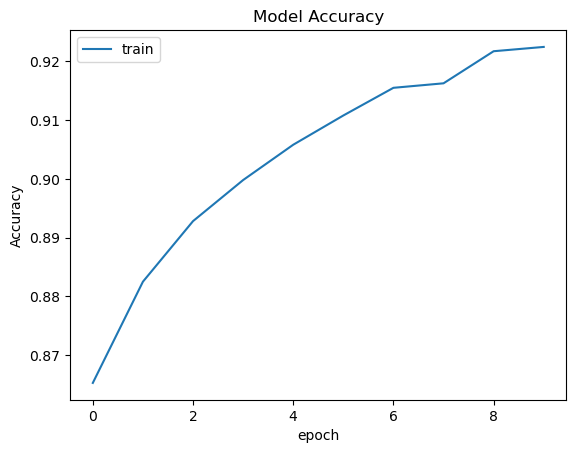

KeyError: 'val_loss'

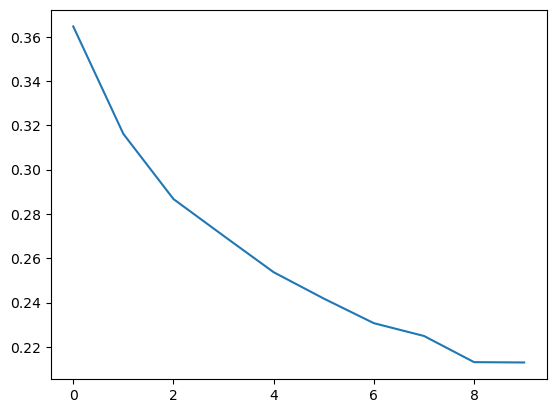

In [79]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')